# Library

In [1]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# 라이브러리 설치
!pip install --upgrade --no-cache-dir numpy seaborn
!pip install ydata_profiling
!pip install missingno
!pip install tqdm

!pip install -U kss==5.2.0
!pip install kiwipiepy
!pip install soynlp
!pip install keybert
!pip install keybert[gensim]
!pip install sentence_transformers

!pip install nltk
!pip install konlpy
!pip install gensim
!pip install bertopic -U
!pip install bertopic[visualization] -U
!pip install -U accelerate
!pip install -U transformers
!pip install datasets

!pip install catboost
!pip install keras-tqdm
!pip install shap

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 283.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
ydata-profiling 4.16.1 requires numpy<2.2,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 

In [2]:
# Auto reload of library
%load_ext autoreload
%autoreload 2

# System related and data input controls
import os

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Visualization
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
## 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
## NanumGothic 폰트 경로 지정
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
## 한글 폰트 설정
matplotlib.rcParams['font.family'] = font_prop.get_name()
plt.rc('font', family='NanumGothic')
sns.set(font=font_prop.get_name())
## 마이너스 표시 설정
plt.rcParams['axes.unicode_minus'] = False

# Custom
## 사용자의 실제 작업경로로 설정!
os.chdir('/content/drive/MyDrive/Research/Analysis/Lecture/특강_20250412_한국지능정보사회진흥원_빅데이터센터')
!ls
from module_KK import *

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
 BA1_TargetMarketing_DataPreprocessing_KK.ipynb     Model
 BA1_TargetMarketing_ModelingAI_KK.ipynb	    module_KK.py
 BA1_TargetMarketing_ModelingBase_KK.ipynb	    outputs
 BA2_DemandForecasting_DataPreprocessing_KK.ipynb   __pycache__
 BA2_DemandForecasting_DataSentiment_KK.ipynb	    README.md
 BA2_DemandForecasting_ModelingAI_KK.ipynb	    Result
 Data						   '나눔 글꼴'
 mlruns


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Hyperparameter

In [6]:
# Data Preprocessing
file_location = os.path.join(os.path.join('.', 'Data', 'df_concat_BA1.csv'))
Y_colname = '기부여부'
TEST_SIZE = 0.2
RANDOM_STATE = 123
SAMPLING_METHOD = 'RandomUnderSampler'
SAMPLING_STRATEGY = 'auto'
SCALER = MinMaxScaler()
LABEL_LIST = ['Non-donation', 'Donation']

# Modeling AI
## DL
tf.random.set_seed(123)
NODE_MLP = [128, 256, 128, 64, 32, 10]
NODE_CNN1 = [128, 256, 128]
NODE_CNN2 = [64, 32, 10]
KERNEL_SIZE = 5
STRIDE = 1
PADDING = 'same'
POOL_SIZE = 2
POOL_STRIDE = 2
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'sigmoid'
REGULARIZER = None
# REGULARIZER = regularizers.l2(0.001)
DROPOUT_RATIO = 0.25
WEIGHT_METHOD = 'class'   # None, 'class', 'sample'
if WEIGHT_METHOD != None:
    LOSS = 'categorical_crossentropy'
else:
    LOSS = 'sparse_categorical_crossentropy'
LEARNING_RATE = 0.001
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)
VALIDATION_SPLIT = 0.25
VALIDATION_DATA = None
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 2
MONITOR = 'val_f1'    # 'val_accuracy', 'val_precision', 'val_recall', 'val_f1', 'val_loss'
MONITOR_MODE = 'max'
EARLYSTOP_PATIENT = int(EPOCHS*0.2)
## SHAP
OUTPUT_TYPE = 'logit'
MAX_DISPLAY = 30
DEPENDENCY = True

# BA Process Summary

In [ ]:
# 데이터분석 프로세스
## 데이터 로딩
df = pd.read_csv(file_location, encoding='utf-8-sig')
## 데이터 전처리
X_train, X_test, Y_train, Y_test, df_prep = preprocessing_MDIS_KK(df)
X_colname = [col for col in df_prep.columns if col != Y_colname]
## 결과 확인
print(X_train.shape, Y_train.shape, X_train.min(), X_train.max())
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())
print('Complete!')

# Logistic Regression
model = LogisticRegression(fit_intercept=True, class_weight='balanced')
model.fit(X_train, Y_train)

# Explanation
explanation_SHAP_KK(model, X_train, X_test, X_colname,
                    MAX_DISPLAY=MAX_DISPLAY, model_type='linear',
                    link=OUTPUT_TYPE, sample_size=1,
                    sample_size_1000=1000,
                    plot_interaction=True)

# Prediction
P_trpred = pd.DataFrame(model.predict_proba(X_train)[:,-1],
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict_proba(X_test)[:,-1],
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='Logistic')
display(Score_te, Score_trte)

Output hidden; open in https://colab.research.google.com to view.

# Prediction Explanation

In [4]:
# 데이터분석 프로세스
## 데이터 로딩
df = pd.read_csv(file_location, encoding='utf-8-sig')
## 데이터 전처리
X_train, X_test, Y_train, Y_test, df_prep = preprocessing_MDIS_KK(df)
X_colname = [col for col in df_prep.columns if col != Y_colname]
## 결과 확인
print(X_train.shape, Y_train.shape, X_train.min(), X_train.max())
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())
print('Complete!')

(57472, 100) (57472, 1) 0.0 1.0000000000000004
(14368, 100) (14368, 1) 0.0 1.0000000000000004
Complete!


## 1) Logistic Regression

Performance: 


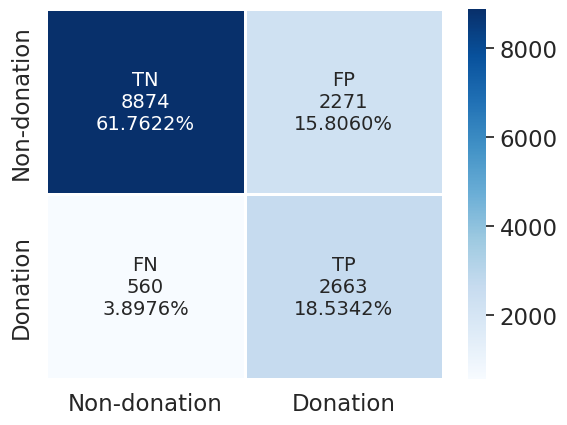

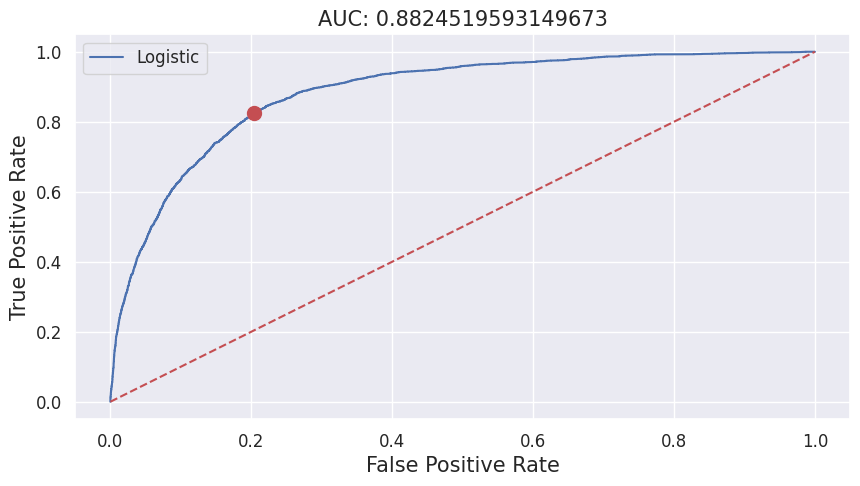

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,14368,2663,8874,2271,560,0.539724,0.826249,0.796231,0.652936,0.802965,0.81124,0.882452


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,71840,13192,44823,11151,2674,0.541922,0.831464,0.800783,0.656172,0.807558,0.816123,0.888751


In [ ]:
# Logistic Regression
model = LogisticRegression(fit_intercept=True, class_weight='balanced')
model.fit(X_train, Y_train)

# # Explanation
# explanation_SHAP_KK(model, X_train, X_test, X_colname,
#                     MAX_DISPLAY=MAX_DISPLAY, model_type='linear',
#                     link=OUTPUT_TYPE, sample_size=1,
#                     sample_size_1000=1000,
#                     plot_interaction=True)

# Prediction
P_trpred = pd.DataFrame(model.predict_proba(X_train)[:,-1],
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict_proba(X_test)[:,-1],
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='Logistic')
display(Score_te, Score_trte)

## 2) Random Forest

Performance: 


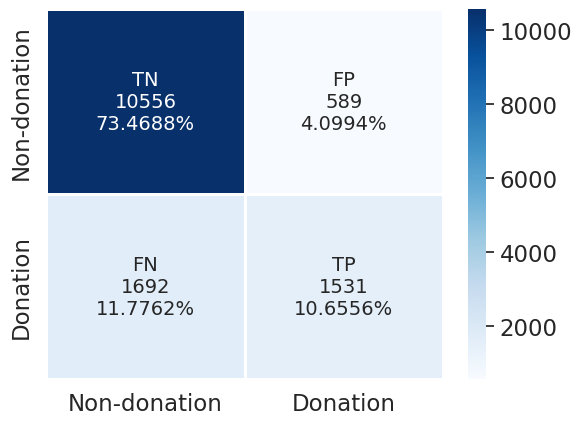

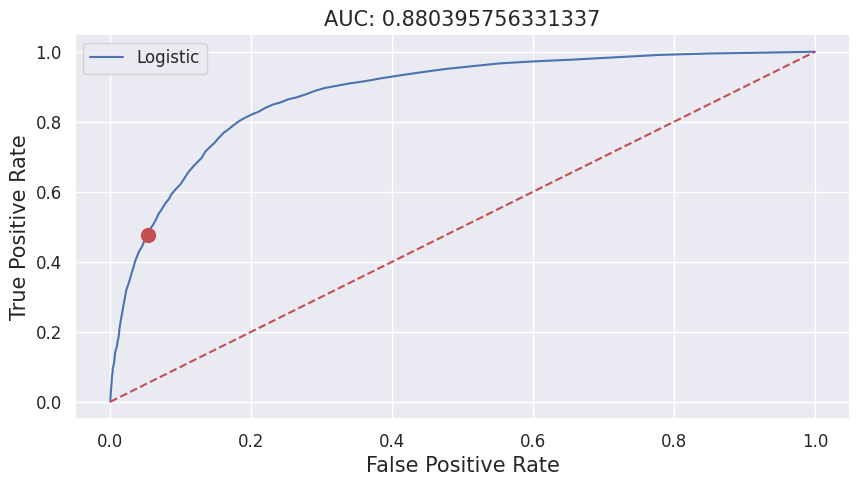

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,14368,1531,10556,589,1692,0.72217,0.475023,0.947151,0.573086,0.841244,0.711087,0.880396


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,71840,14174,55385,589,1692,0.960103,0.893357,0.989477,0.925528,0.968249,0.941417,0.989389


In [ ]:
# Random Forest
model = RandomForestClassifier(n_estimators=100,
                               class_weight='balanced',   # 'balanced_subsample'
                               random_state=123)
model.fit(X_train, Y_train)

# # Explanation
# explanation_SHAP_KK(model, X_train, X_test, X_colname,
#                     MAX_DISPLAY=MAX_DISPLAY, model_type='tree',
#                     link=OUTPUT_TYPE, sample_size=1,
#                     sample_size_1000=1000,
#                     plot_interaction=True)

# Prediction
P_trpred = pd.DataFrame(model.predict_proba(X_train)[:,-1],
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict_proba(X_test)[:,-1],
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='Logistic')
display(Score_te, Score_trte)

## 3) XGBoost

Performance: 


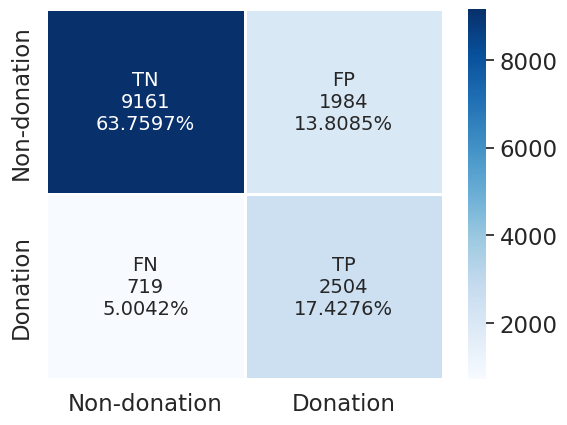

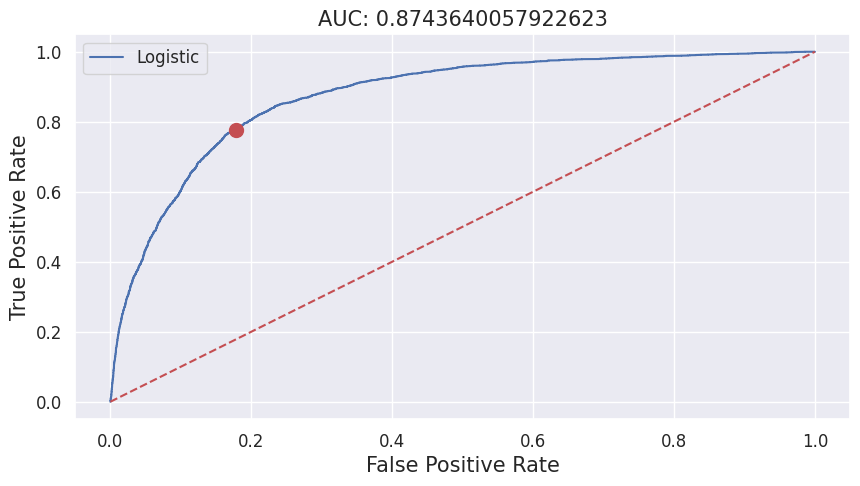

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,14368,2504,9161,1984,719,0.557932,0.776916,0.821983,0.649462,0.811874,0.799449,0.874364


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,71840,14250,48241,7733,1616,0.648228,0.898147,0.861847,0.752992,0.869864,0.879997,0.946644


In [ ]:
# XGBoost
model = XGBClassifier(n_estimators=100,
                      scale_pos_weight=Y_train.value_counts()[0]/Y_train.value_counts()[1],   # binary
                      random_state=123)
model.fit(X_train, Y_train)

# # Explanation
# explanation_SHAP_KK(model, X_train, X_test, X_colname,
#                     MAX_DISPLAY=MAX_DISPLAY, model_type='tree',
#                     link=OUTPUT_TYPE, sample_size=1,
#                     sample_size_1000=1000,
#                     plot_interaction=True)

# Prediction
P_trpred = pd.DataFrame(model.predict_proba(X_train)[:,-1],
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict_proba(X_test)[:,-1],
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='Logistic')
display(Score_te, Score_trte)

## 4) LightGBM

[LightGBM] [Info] Number of positive: 12643, number of negative: 44829
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 57472, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Performance: 


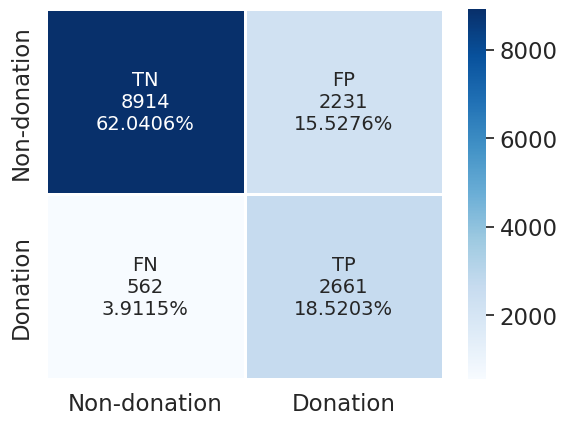

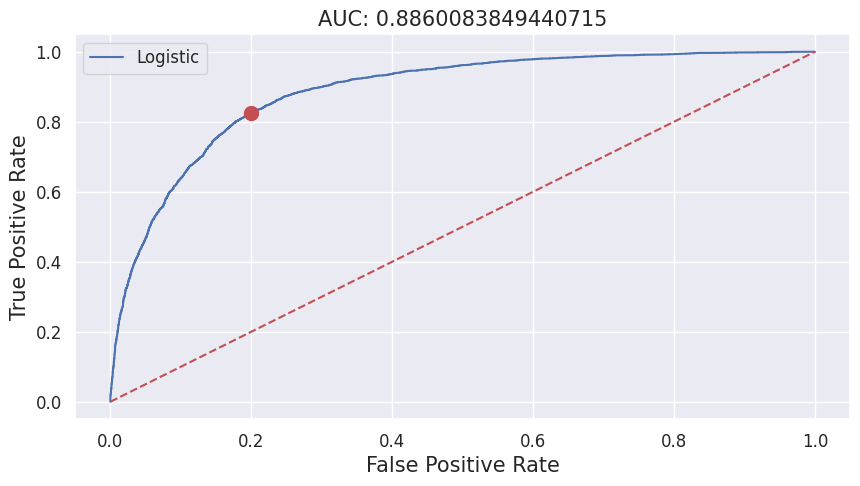

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,14368,2661,8914,2231,562,0.543949,0.825628,0.799821,0.655823,0.80561,0.812724,0.886008


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,71840,13632,45334,10640,2234,0.561635,0.859196,0.809912,0.679257,0.820796,0.834554,0.910995


In [ ]:
# LGBM
model = LGBMClassifier(n_estimators=100,
                       class_weight='balanced',
                       random_state=123)
model.fit(X_train, Y_train)

# # Explanation
# explanation_SHAP_KK(model, X_train, X_test, X_colname,
#                     MAX_DISPLAY=MAX_DISPLAY, model_type='tree',
#                     link=OUTPUT_TYPE, sample_size=1,
#                     sample_size_1000=1000,
#                     plot_interaction=True)

# Prediction
P_trpred = pd.DataFrame(model.predict_proba(X_train)[:,-1],
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict_proba(X_test)[:,-1],
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='Logistic')
display(Score_te, Score_trte)

## 5) CatBoost

Learning rate set to 0.479979
0:	learn: 0.5032705	total: 89.1ms	remaining: 8.82s
1:	learn: 0.4457807	total: 120ms	remaining: 5.89s
2:	learn: 0.4328374	total: 153ms	remaining: 4.95s
3:	learn: 0.4255267	total: 180ms	remaining: 4.33s
4:	learn: 0.4215868	total: 210ms	remaining: 3.98s
5:	learn: 0.4187805	total: 237ms	remaining: 3.72s
6:	learn: 0.4166851	total: 264ms	remaining: 3.51s
7:	learn: 0.4150256	total: 289ms	remaining: 3.32s
8:	learn: 0.4138078	total: 316ms	remaining: 3.19s
9:	learn: 0.4121952	total: 346ms	remaining: 3.11s
10:	learn: 0.4110252	total: 395ms	remaining: 3.19s
11:	learn: 0.4097314	total: 425ms	remaining: 3.12s
12:	learn: 0.4088642	total: 454ms	remaining: 3.04s
13:	learn: 0.4079152	total: 482ms	remaining: 2.96s
14:	learn: 0.4070156	total: 510ms	remaining: 2.89s
15:	learn: 0.4060385	total: 536ms	remaining: 2.81s
16:	learn: 0.4053984	total: 565ms	remaining: 2.76s
17:	learn: 0.4047321	total: 595ms	remaining: 2.71s
18:	learn: 0.4039707	total: 621ms	remaining: 2.65s
19:	learn:

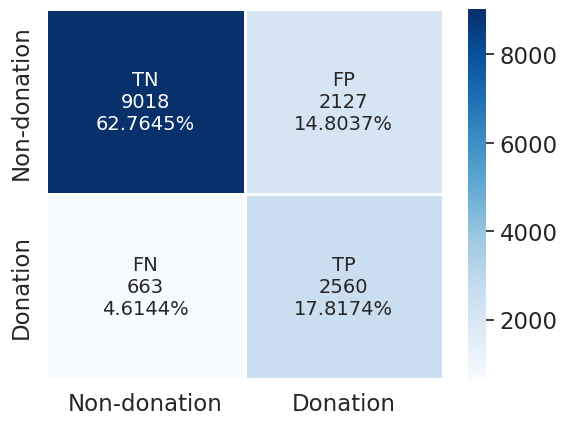

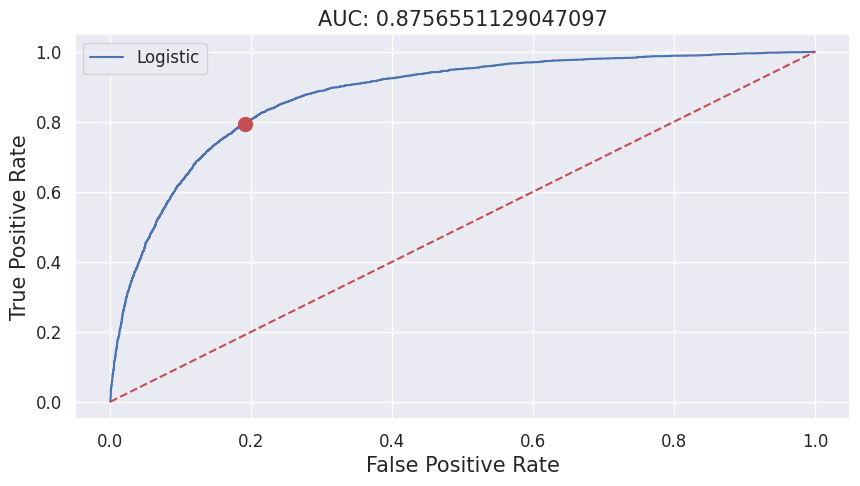

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,14368,2560,9018,2127,663,0.546192,0.794291,0.809152,0.647282,0.805818,0.801722,0.875655


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,71840,13806,46471,9503,2060,0.592303,0.870163,0.830225,0.704837,0.839045,0.850194,0.922318


In [ ]:
# CatBoost
model = CatBoostClassifier(n_estimators=100,
                           auto_class_weights='Balanced',
                           allow_writing_files=False,
                           random_state=123)
model.fit(X_train, Y_train)

# # Explanation
# explanation_SHAP_KK(model, X_train, X_test, X_colname,
#                     MAX_DISPLAY=MAX_DISPLAY, model_type='tree',
#                     link=OUTPUT_TYPE, sample_size=1,
#                     sample_size_1000=1000,
#                     plot_interaction=True)

# Prediction
P_trpred = pd.DataFrame(model.predict_proba(X_train)[:,-1],
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict_proba(X_test)[:,-1],
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='Logistic')
display(Score_te, Score_trte)

## 6) MLP

In [7]:
# MLP
## reshape
if WEIGHT_METHOD != None:
    Y_train_dl, Y_test_dl = reshape_YtoOneHot(Y_train, Y_test)
else:
    Y_train_dl, Y_test_dl = Y_train.copy(), Y_test.copy()
X_train_dl, X_test_dl = X_train.copy(), X_test.copy()

## 모델링
ALGO_NAME='MLP'
model = modeling_MLP(X_train_dl, Y_train_dl,
                     node_MLP=NODE_MLP,
                     HIDDEN_ACTIVATION=HIDDEN_ACTIVATION, OUTPUT_ACTIVATION=OUTPUT_ACTIVATION,
                     REGULARIZER=REGULARIZER, DROPOUT_RATIO=DROPOUT_RATIO,
                     LOSS=LOSS, OPTIMIZER=OPTIMIZER, LEARNING_RATE=LEARNING_RATE)
model, FILENAME = learning(model, X_train_dl, X_test_dl, Y_train_dl,
                           WEIGHT_METHOD=WEIGHT_METHOD,
                           VALIDATION_SPLIT=VALIDATION_SPLIT, VALIDATION_DATA=VALIDATION_DATA,
                           BATCH_SIZE=BATCH_SIZE, EPOCHS=EPOCHS, VERBOSE=VERBOSE,
                           MONITOR=MONITOR, MONITOR_MODE=MONITOR_MODE, EARLYSTOP_PATIENT=EARLYSTOP_PATIENT,
                           shap=False, X_colname=X_colname, X_top_display=MAX_DISPLAY)
Score_te_mlp, Score_trte_mlp = prediction_class(model, X_train_dl, Y_train_dl, X_test_dl, Y_test_dl,
                                                LABEL_LIST=LABEL_LIST, ALGO_NAME=ALGO_NAME)
display(Score_te_mlp, Score_trte_mlp)

## 베스트 모델 로딩
model_mlp = load_model(FILENAME)
Score_te_mlp, Score_trte_mlp = prediction_class(model, X_train_dl, Y_train_dl, X_test_dl, Y_test_dl,
                                                LABEL_LIST=LABEL_LIST, ALGO_NAME=ALGO_NAME)
display(model_mlp, Score_te_mlp, Score_trte_mlp)

# # Explanation
# explanation_SHAP_KK(model, X_train, X_test, X_colname,
#                     MAX_DISPLAY=MAX_DISPLAY, model_type='tree',
#                     link=OUTPUT_TYPE, sample_size=1,
#                     sample_size_1000=1000,
#                     plot_interaction=True)

# Prediction
P_trpred = pd.DataFrame(model.predict_proba(X_train)[:,-1],
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict_proba(X_test)[:,-1],
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='Logistic')
display(Score_te, Score_trte)

Y_train_reshape: (57472, 1) --> (57472, 2)
Y_test_reshape: (14368, 1) --> (14368, 2)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,536 (349.75 KB)

 Trainable params: 89,536 (349.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-7-06972a04e4e4>", line 16, in <cell line: 0>

  File "/content/drive/MyDrive/Research/Analysis/Lecture/특강_20250412_한국지능정보사회진흥원_빅데이터센터/module_KK.py", line 601, in learning

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_7190]

## 7) CNN

In [ ]:
# CNN
## reshape
if WEIGHT_METHOD != None:
    Y_train_dl, Y_test_dl = reshape_YtoOneHot(Y_train, Y_test)
else:
    Y_train_dl, Y_test_dl = Y_train.copy(), Y_test.copy()
X_train_dl, X_test_dl = reshape_X2Dto3D(X_train, X_test)

## 모델링
ALGO_NAME='CNN'
model = modeling_CNN1D(X_train_dl, Y_train_dl,
                       node_CNN1=NODE_CNN1,
                       node_CNN2=NODE_CNN2,
                       HIDDEN_ACTIVATION=HIDDEN_ACTIVATION, OUTPUT_ACTIVATION=OUTPUT_ACTIVATION,
                       KERNEL_SIZE=KERNEL_SIZE, STRIDE=STRIDE, PADDING=PADDING,
                       POOL_SIZE=POOL_SIZE, POOL_STRIDE=POOL_STRIDE,
                       REGULARIZER=REGULARIZER, DROPOUT_RATIO=DROPOUT_RATIO,
                       LOSS=LOSS, OPTIMIZER=OPTIMIZER, LEARNING_RATE=LEARNING_RATE)
model, FILENAME = learning(model, X_train_dl, X_test_dl, Y_train_dl,
                           WEIGHT_METHOD=WEIGHT_METHOD,
                           VALIDATION_SPLIT=VALIDATION_SPLIT, VALIDATION_DATA=VALIDATION_DATA,
                           BATCH_SIZE=BATCH_SIZE, EPOCHS=EPOCHS, VERBOSE=VERBOSE,
                           MONITOR=MONITOR, MONITOR_MODE=MONITOR_MODE, EARLYSTOP_PATIENT=EARLYSTOP_PATIENT,
                           shap=False, X_colname=X_colname, X_top_display=MAX_DISPLAY)
Score_te_cnn, Score_trte_cnn = prediction_class(model, X_train_dl, Y_train_dl, X_test_dl, Y_test_dl,
                                                LABEL_LIST=LABEL_LIST, ALGO_NAME=ALGO_NAME)
display(Score_te_cnn, Score_trte_cnn)

## 베스트 모델 로딩
model_mlp = load_model(FILENAME)
Score_te_mlp, Score_trte_mlp = prediction_class(model, X_train_dl, Y_train_dl, X_test_dl, Y_test_dl,
                                                LABEL_LIST=LABEL_LIST, ALGO_NAME=ALGO_NAME)
display(model_mlp, Score_te_mlp, Score_trte_mlp)

# # Explanation
# explanation_SHAP_KK(model, X_train, X_test, X_colname,
#                     MAX_DISPLAY=MAX_DISPLAY, model_type='tree',
#                     link=OUTPUT_TYPE, sample_size=1,
#                     sample_size_1000=1000,
#                     plot_interaction=True)

# Prediction
P_trpred = pd.DataFrame(model.predict_proba(X_train)[:,-1],
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict_proba(X_test)[:,-1],
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

# Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='Logistic')
display(Score_te, Score_trte)

Y_train_reshape: (57472, 1) --> (57472, 2)
Y_test_reshape: (14368, 1) --> (14368, 2)
X_train_reshape: (57472, 100) --> (57472, 100, 1)
X_test_reshape: (14368, 100) --> (14368, 100, 1)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 100, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 100, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 50, 256)             │         164,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 25, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 25, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 25, 128)             │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          98,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 429,632 (1.64 MB)

 Trainable params: 429,632 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

'/content/drive/MyDrive/Research/Analysis/Lecture/특강_20250412_한국지능정보사회진흥원_빅데이터센터/Model/DL_Class_20250406_121256.keras'

Epoch 1/5


NotImplementedError: numpy() is only available when eager execution is enabled.

## Performance Comparison

In [ ]:
folder_location = os.path.join(os.getcwd(),'Result')
prediction_summary(folder_location=folder_location,
                   algonames=['Logistic Regression', 'Random Forest', 'XGBoost', 'LGBM', 'CatBoost', 'MLP', 'CNN'])


# Feature Explanation